# Modelos de Regresion

### Preparar el entorno y cargar los datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carga del dataset
data_path = "../data/train.csv"
df = pd.read_csv(data_path)

# Preprocesamiento inicial
df['SalePrice_log'] = np.log(df['SalePrice'])

# Eliminamos columnas innecesarias
df.drop(columns=['Id'], inplace=True)

# Manejo de valores nulos basado en el análisis exploratorio
for col in df.select_dtypes(include=['number']).columns:
    df.loc[:, col] = df[col].fillna(df[col].median())  # Numéricas con la mediana

for col in df.select_dtypes(include=['object']).columns:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])  # Categóricas con la moda

# División en conjunto de entrenamiento y prueba
X = df.drop(columns=['SalePrice', 'SalePrice_log'])  # Variables predictoras
y = df['SalePrice_log']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirmación de los tamaños
print(f"Tamaño de X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}, y_test: {y_test.shape}")

Tamaño de X_train: (1168, 79), X_test: (292, 79)
Tamaño de y_train: (1168,), y_test: (292,)


### 7. Modelo univariado de regresión lineal.

In [4]:
from sklearn.linear_model import LinearRegression

# Seleccionar la variable predictora y la variable objetivo
X_uni = X_train[['GrLivArea']]  # Solo usamos GrLivArea como predictor
X_test_uni = X_test[['GrLivArea']]
y = y_train  # SalePrice_log como variable objetivo

# Crear y entrenar el modelo
modelo_uni = LinearRegression()
modelo_uni.fit(X_uni, y)

# Hacer predicciones
y_pred_train = modelo_uni.predict(X_uni)
y_pred_test = modelo_uni.predict(X_test_uni)

# Obtener coeficientes
print(f"Intercepto: {modelo_uni.intercept_}")
print(f"Coeficiente de GrLivArea: {modelo_uni.coef_[0]}")

Intercepto: 11.246804477869594
Coeficiente de GrLivArea: 0.0005131901365587289


In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular métricas de error
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

# Imprimir resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

MAE (Error Absoluto Medio): 0.2144
MSE (Error Cuadrático Medio): 0.0858
RMSE (Raíz del Error Cuadrático Medio): 0.2929
R² (Coeficiente de Determinación): 0.5402


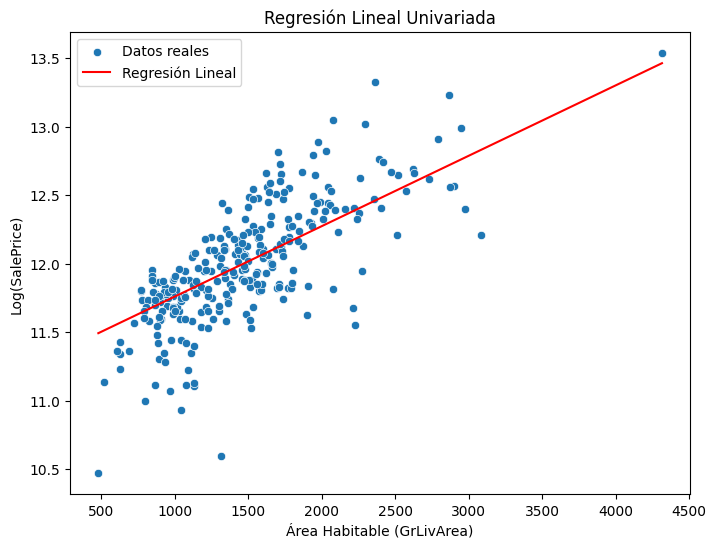

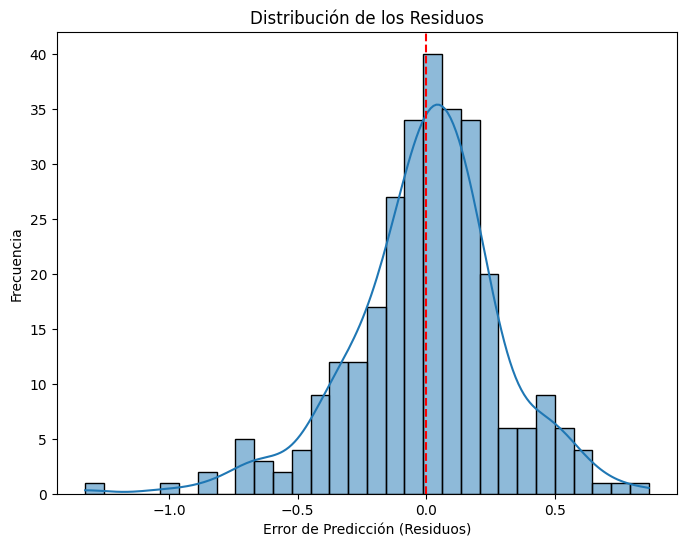

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la regresión lineal
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['GrLivArea'], y=y_test, label="Datos reales")
sns.lineplot(x=X_test['GrLivArea'], y=y_pred_test, color='red', label="Regresión Lineal")
plt.xlabel("Área Habitable (GrLivArea)")
plt.ylabel("Log(SalePrice)")
plt.title("Regresión Lineal Univariada")
plt.legend()
plt.show()

# Análisis de residuos
residuos = y_test - y_pred_test
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Error de Predicción (Residuos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos")
plt.show()